In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Importing necessary libraries for this notebook.
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, l1
from keras.metrics import BinaryAccuracy


In [12]:
link1 = "https://drive.google.com/uc?export=download&id=1TViUrq3TLJgbAhzAA-dDO2v9h3SsoOyQ"
link2 = "https://drive.google.com/uc?export=download&id=1-u7ImPxsZakcw7wUQddQkN8vfWW3LXcz"
link3 = "https://drive.google.com/uc?export=download&id=1TViUrq3TLJgbAhzAA-dDO2v9h3SsoOyQ"

In [13]:
datatest = pd.read_csv(link1)
datatest2 = pd.read_csv(link2)
datatraining = pd.read_csv(link3)

In [15]:
print(datatest.info())
datatest.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 767.0+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [17]:
print(datatest2.info())
datatest2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 867.5+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [18]:
print(datatraining.info())
datatraining.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [19]:
datatest['date'] = pd.to_datetime(datatest['date'])
datatest2['date'] = pd.to_datetime(datatest2['date'])
datatraining['date'] = pd.to_datetime(datatraining['date'])
datatest.reset_index(drop=True, inplace=True)
datatest2.reset_index(drop=True, inplace=True)
datatraining.reset_index(drop=True, inplace=True)

In [20]:
datatest['date'] = pd.to_datetime(datatest['date'])
datatest2['date'] = pd.to_datetime(datatest2['date'])
datatraining['date'] = pd.to_datetime(datatraining['date'])
datatest.reset_index(drop=True, inplace=True)
datatest2.reset_index(drop=True, inplace=True)
datatraining.reset_index(drop=True, inplace=True)

In [21]:
datatraining.describe()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,2015-02-07 13:41:59.688812544,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
min,2015-02-04 17:51:00,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,2015-02-06 03:46:30,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,2015-02-07 13:41:59,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,2015-02-08 23:37:30,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,2015-02-10 09:33:00,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000
std,NaN,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982


In [22]:
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(datatraining[columns]))
datatest[columns] = scaler.transform(np.array(datatest[columns]))
datatest2[columns] = scaler.transform(np.array(datatest2[columns]))
datatraining[columns] = scaler.transform(np.array(datatraining[columns]))

       Temperature     Humidity        Light          CO2  HumidityRatio
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000
mean      0.387341     0.401676     0.077292     0.119942       0.312576
std       0.243281     0.247233     0.125947     0.194536       0.224186
min       0.000000     0.000000     0.000000     0.000000       0.000000
25%       0.167464     0.154431     0.000000     0.016246       0.106304
50%       0.332536     0.423623     0.000000     0.025220       0.296338
75%       0.571770     0.616307     0.165795     0.139925       0.441308
max       1.000000     1.000000     1.000000     1.000000       1.000000


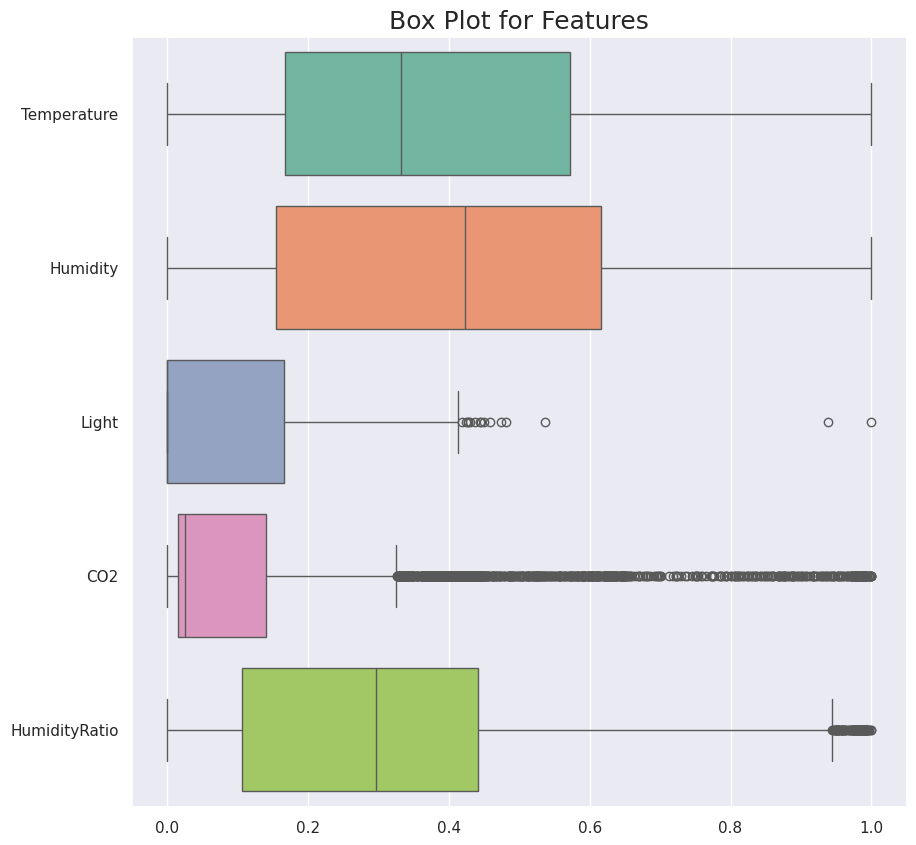

In [23]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=datatraining.drop(['date', 'Occupancy'],axis=1), orient="h", palette="Set2")
print(datatraining.drop(['date', 'Occupancy'],axis=1).describe())


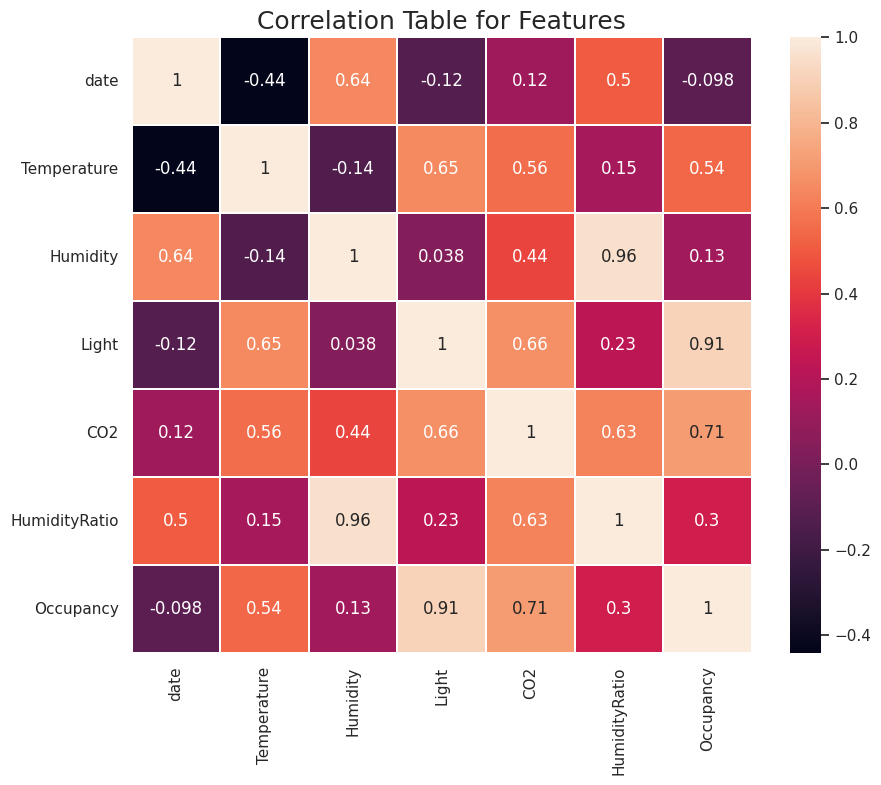

In [28]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(datatraining.corr(), annot=True, linewidths=.2)

In [30]:
data = datatraining.copy()
data.Occupancy = data.Occupancy.astype(str)
fig = px.scatter_3d(data, x='Temperature', y='Humidity', z='CO2', size='Light', color='Occupancy', color_discrete_map={'1':'red', '0':'blue'})
fig.update_layout(scene_zaxis_type="log", title={'text': "Features and Occupancy",
                                                'y':0.9,
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

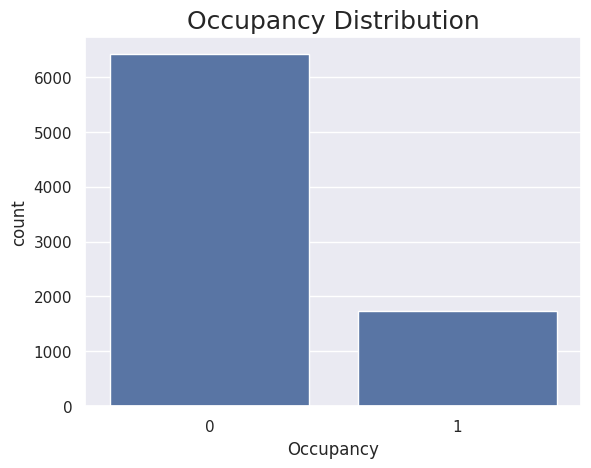

In [31]:
sns.set(style="darkgrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="Occupancy", data=datatraining)

In [32]:
hours_1 = []
hours_0 = []
for date in datatraining[datatraining['Occupancy'] == 1]['date']:
    hours_1.append(date.hour)
for date in datatraining[datatraining['Occupancy'] == 0]['date']:
    hours_0.append(date.hour)

<ipython-input-33-0c4aafc88843>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-33-0c4aafc88843>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




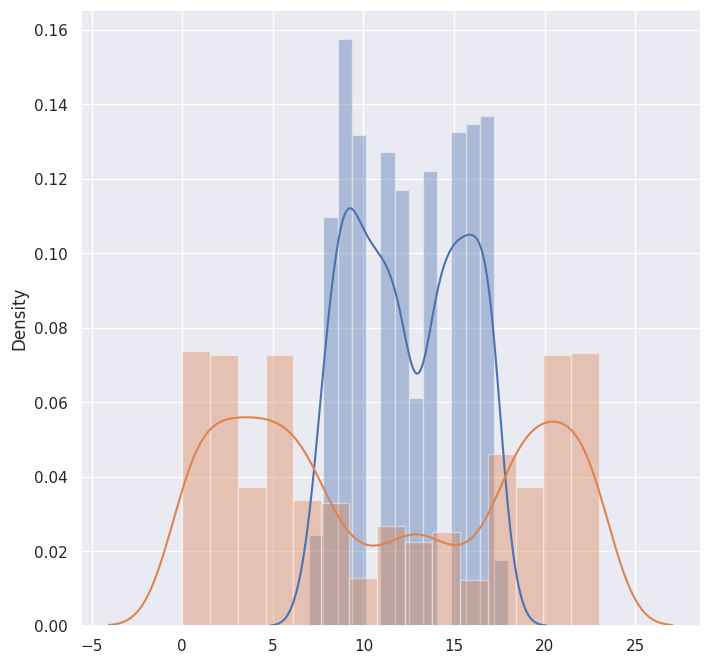

In [33]:
plt.figure(figsize=(8,8))
ax = sns.distplot(hours_1)
ax = sns.distplot(hours_0)

In [34]:
datatest['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest['date']]
datatest2['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest2['date']]
datatraining['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatraining['date']]
datatraining.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,period_of_day
3796,2015-02-07 09:07:00,0.183612,0.123142,0.060466,0.029862,0.025673,0,1
4562,2015-02-07 21:53:00,0.188995,0.474317,0.000000,0.015009,0.322688,0,0
5672,2015-02-08 16:23:00,0.143541,0.444966,0.020047,0.002630,0.286094,0,1
714,2015-02-05 05:44:59,0.452153,0.301933,0.000000,0.024911,0.239544,0,0
4236,2015-02-07 16:27:00,0.458732,0.138339,0.003880,0.012842,0.093330,0,1
693,2015-02-05 05:23:59,0.452153,0.301933,0.000000,0.019031,0.239544,0,0
5668,2015-02-08 16:19:00,0.151515,0.446307,0.020047,0.008201,0.289279,0,1
1728,2015-02-05 22:38:59,0.358852,0.194659,0.000000,0.024911,0.122558,0,0
1382,2015-02-05 16:53:00,0.787081,0.400268,0.285191,0.391717,0.421290,1,1
7609,2015-02-10 00:40:00,0.320574,0.726562,0.000000,0.040693,0.579219,0,0


In [35]:
X_train = datatraining.drop(columns=['date', 'Occupancy'], axis=1)
y_train = datatraining['Occupancy']
X_validation = datatest.drop(columns=['date', 'Occupancy'], axis=1)
y_validation = datatest['Occupancy']
X_test = datatest2.drop(columns=['date', 'Occupancy'], axis=1)
y_test = datatest2['Occupancy']

In [36]:
# parameter-tuning for knn
n_neighbors_list = [7,15,45,135]
weights_list = ['uniform', 'distance']
metric_list = ['euclidean', 'manhattan']
accuracies = {}
for n in n_neighbors_list:
    for weight in weights_list:
        for metric in metric_list:
            knn_model = KNeighborsClassifier(n_neighbors=n, weights=weight, metric=metric)
            knn_model.fit(X_train, y_train)
            accuracy = knn_model.score(X_validation, y_validation)
            accuracies[str(n)+"/"+weight+"/"+metric] = accuracy

In [37]:
plotdata = pd.DataFrame()
plotdata['Parameters'] = accuracies.keys()
plotdata['Accuracy'] = accuracies.values()
fig = px.line(plotdata, x="Parameters", y="Accuracy")
fig.update_layout(title={'text': "Accuracies for Different Hyper-Parameters",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

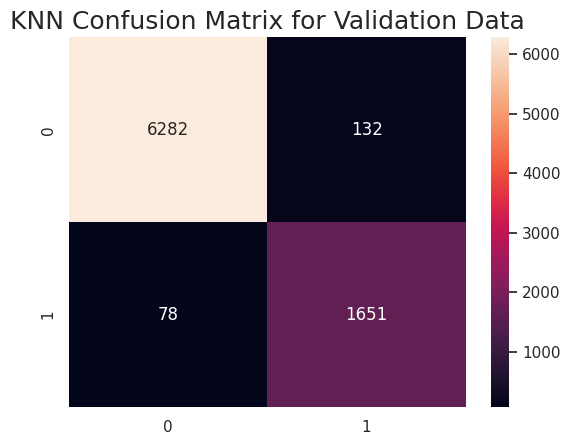

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=135)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_validation)
plt.title("KNN Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

In [40]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
print("Accuracy for SVM on validation data: {}%".format(round((svm_model.score(X_validation, y_validation)*100),2)))

Accuracy for SVM on validation data: 98.87%


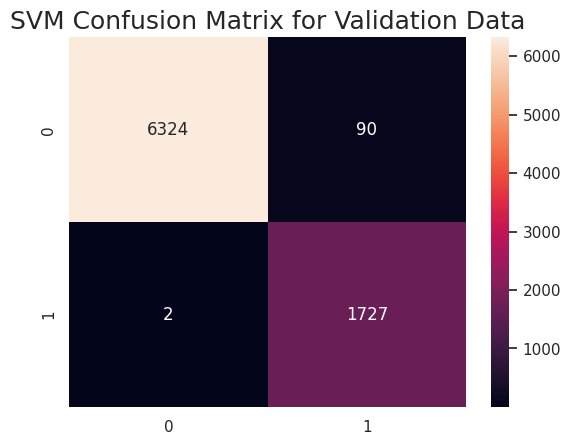

In [41]:
y_pred = svm_model.predict(X_validation)
plt.title("SVM Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")

In [42]:
# Classification with Neural Networks

# NN without regularization
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=6))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8124 - loss: 0.5317 - val_accuracy: 0.9606 - val_loss: 0.1654
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9617 - loss: 0.1301 - val_accuracy: 0.9751 - val_loss: 0.0770
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0780 - val_accuracy: 0.9832 - val_loss: 0.0627
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0596 - val_accuracy: 0.9844 - val_loss: 0.0559
Epoch 5/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9831 - loss: 0.0571 - val_accuracy: 0.9859 - val_loss: 0.0518
Epoch 6/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9860 - loss: 0.0518 - val_accuracy: 0.9871 - val_loss: 0.0484
Epoch 7/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9873 - loss: 0.0490 - val_accuracy: 0.9874 - val_loss: 0.0466
Epoch 8/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9861 - loss: 0.0498 - val_accuracy: 0.

In [43]:
# NN with 0.2 dropout ratio before the hidden layer.
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_dim=6))
model2.add(Dropout(0.2))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8118 - loss: 0.5085 - val_accuracy: 0.9661 - val_loss: 0.1217
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9673 - loss: 0.1137 - val_accuracy: 0.9756 - val_loss: 0.0740
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9779 - loss: 0.0788 - val_accuracy: 0.9829 - val_loss: 0.0646
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9756 - loss: 0.0751 - val_accuracy: 0.9839 - val_loss: 0.0579
Epoch 5/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9803 - loss: 0.0702 - val_accuracy: 0.9858 - val_loss: 0.0531
Epoch 6/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9820 - loss: 0.0602 - val_accuracy: 0.9859 - val_loss: 0.0500
Epoch 7/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9842 - loss: 0.0577 - val_accuracy: 0.9864 - val_loss: 0.0494
Epoch 8/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0496 - val_accuracy: 0.9874 - val

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1

# NN with L1 (Lasso) regularization
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l1(0.01)))
model3.add(Dense(16, activation='relu', kernel_regularizer=l1(0.01)))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7888 - loss: 1.4835 - val_accuracy: 0.7877 - val_loss: 0.6154
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8799 - loss: 0.5112 - val_accuracy: 0.9644 - val_loss: 0.3539
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9665 - loss: 0.3366 - val_accuracy: 0.9726 - val_loss: 0.2866
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9763 - loss: 0.2714 - val_accuracy: 0.9730 - val_loss: 0.2473
Epoch 5/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9710 - loss: 0.2410 - val_accuracy: 0.9764 - val_loss: 0.2205
Epoch 6/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9757 - loss: 0.2152 - val_accuracy: 0.9792 - val_loss: 0.2052
Epoch 7/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9796 - loss: 0.2031 - val_accuracy: 0.9832 - val_loss: 0.1959
Epoch 8/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9797 - loss: 0.1980 - val_accuracy: 0.9843 - val_

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# NN with L2 (Ridge) regularization
model4 = Sequential()
model4.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l2(0.01)))
model4.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])

history4 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



255/255 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7274 - loss: 0.7950 - val_accuracy: 0.9677 - val_loss: 0.3384
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9683 - loss: 0.2918 - val_accuracy: 0.9732 - val_loss: 0.2272
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9744 - loss: 0.2161 - val_accuracy: 0.9757 - val_loss: 0.1938
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9729 - loss: 0.1906 - val_accuracy: 0.9718 - val_loss: 0.1765
Epoch 5/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9725 - loss: 0.1769 - val_accuracy: 0.9753 - val_loss: 0.1643
Epoch 6/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.1596 - val_accuracy: 0.9786 - val_loss: 0.1557
Epoch 7/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9789 - loss: 0.1531 - val_accuracy: 0.9832 - val_loss: 0.1508
Epoch 8/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.1465 - val_accuracy: 0.9850 - val_

In [49]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']


fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(loss1)), y=loss1,
                    name='Training Loss without Regularization', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss1)), y=val_loss1,
                    name='Validation Loss without Regularization', line = dict(color='firebrick')))

fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2,
                    name='Training Loss with Dropout', line=dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss2)), y=val_loss2,
                    name='Validation Loss with Dropout', line = dict(color='firebrick', dash='dash')))

fig.add_trace(go.Scatter(x=np.arange(len(loss3)), y=loss3,
                    name='Training Loss with L1 Regularization', line=dict(color='royalblue', dash='dot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss3)), y=val_loss3,
                    name='Validation Loss with L1 Regularization', line = dict(color='firebrick', dash='dot')))

fig.add_trace(go.Scatter(x=np.arange(len(loss4)), y=loss4,
                    name='Training Loss with L2 Regularization', line=dict(color='royalblue', dash='longdashdot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss4)), y=val_loss4,
                    name='Validation Loss with L2 Regularization', line = dict(color='firebrick', dash='longdashdot')))


fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Loss',
                  title={'text': "Training and Validation Losses for Different Models",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))  # Dropout layer
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8055 - loss: 0.8076
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9475 - loss: 0.2962
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9611 - loss: 0.2147
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.1916
Epoch 5/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.1692
Epoch 6/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9774 - loss: 0.1526
Epoch 7/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9780 - loss: 0.1490
Epoch 8/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9798 - loss: 0.1403
Epoch 9/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9829 - loss: 0.1377
Epoch 10/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9797 - loss: 0.1355
Epoch 11/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9790 - loss: 0.1348
Epoch 12/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [53]:
# //Comparing Performances of SVM and Neural Network

print("Accuracy for SVM on test data: {}%\n".format(round((svm_model.score(X_test, y_test)*100),2)))
print("Accuracy for Neural Network model on test data: {}%".format(round((model.evaluate(X_test, y_test)[1]*100),2)))

Accuracy for SVM on test data: 98.38%

305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9800 - loss: 0.0979
Accuracy for Neural Network model on test data: 97.27%


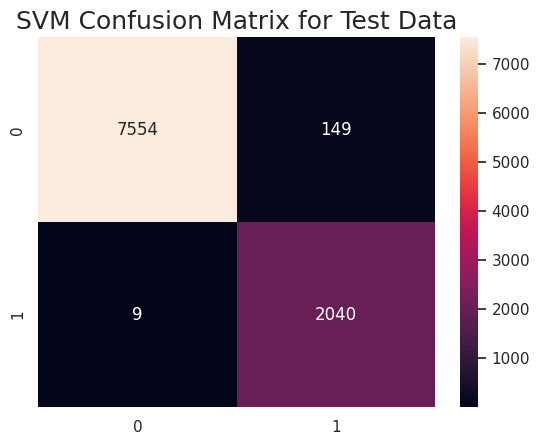

In [55]:
y_pred = svm_model.predict(X_test)
plt.title("SVM Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


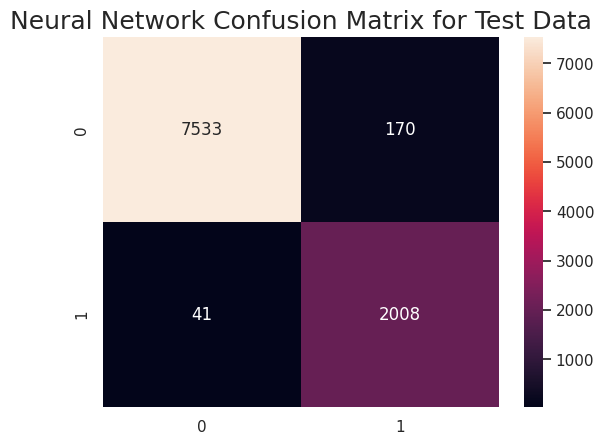

In [56]:
y_pred = model.predict(X_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
plt.title("Neural Network Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")